<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Colab_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Crisp Cerebella - Colab Demo**

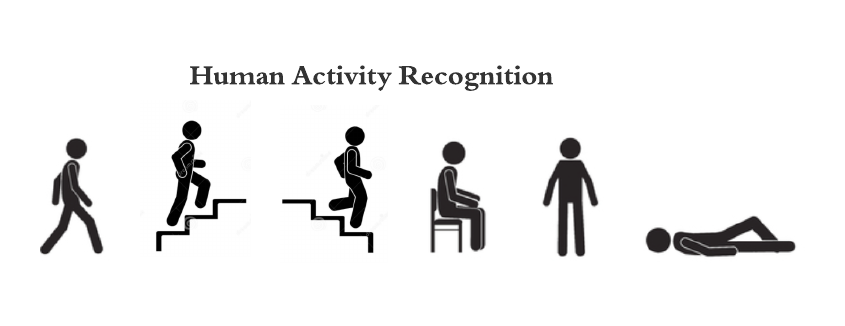

...Abstract of the report

#Import of all necesarry functions and librarys

In [1]:
# Clone the GitHub Repository to have all data and functions abailable
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 731, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 731 (delta 82), reused 37 (delta 12), pack-reused 573
Receiving objects: 100% (731/731), 312.84 MiB | 31.02 MiB/s, done.
Resolving deltas: 100% (383/383), done.
Checking out files: 100% (116/116), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 2.9 MB/s 


In [3]:
import os 
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *
from CrispCerebella.Code.test_functions import *
from CrispCerebella.Code.data_visualization import *

#Data-Loading

In [5]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


#Data Visualization and Exploration

#Loading the best trained model

#Performance of the model 

Explanation of what we see

#Evaluation of the results